In [0]:
pip install torch gwpy lalsuite Pycbc

In [0]:
import pycbc.noise
import pycbc.psd
import pylab
from pycbc.waveform import get_td_waveform
from pycbc.detector import Detector
from gwpy.timeseries import TimeSeries

In [0]:
from tqdm import tqdm
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import matplotlib.image as mpimg
import matplotlib as mlp
import numpy as np
%matplotlib inline

#For GW signals NOT noise

##GAUSSIAN

##making training data

In [0]:
#if __name__ == '__main__':

#------------------------------------------
#         Gaussian noise
#------------------------------------------

freq=4096 #frequency in Hz
flow = 30.0 #higher flow rates to higer noise amplitude 
delta_f = 1.0 / 16
flen = int((freq/2) / delta_f) + 1
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
n=5 
delta_t = 1 / freq 
tsamples = int(n/ delta_t)

apx=['TaylorT1', 'TaylorT2', 'TaylorT3', 'SEOBNRv1', 'SEOBNRv2', 'SEOBNRv2_opt', 'SEOBNRv3', 'SEOBNRv3_pert', 'SEOBNRv3_opt', 'SEOBNRv3_opt_rk4', 'SEOBNRv4', 'SEOBNRv4_opt', 'SEOBNRv4P', 'SEOBNRv2T', 'SEOBNRv4T']
signal_hc=np.zeros((7350,20480))
check=np.zeros(20480)
noise_hc=np.zeros(20480)
k=0
left=0
len_apx=len(apx)
for a in range(len_apx):
  check=np.zeros(20480)
  for m1 in range (5,100,5):
    for m2 in range (5,100,5):
      for d in range(50,1001,50):
        for fl in [30,60,80,120]:
          if (m1+m2+d+fl) not in check:
            check[k]=m1+m2+d+fl
            hp,hc = get_td_waveform(approximant=apx[a],
                              mass1=m1,mass2=m2,
                              delta_t=1.0/4096,
                              f_lower=fl,f_final=50, 
                              distance=d)
            len_hc=len(hc)
            if len_hc<=20480 or len_hc<=20480 :
              for i in range(3664):
                
                noise_hc=5*pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=200)
                for j in range(len_hc):
                  signal_hc[i][j]=noise_hc[j]+hc[j]
                for left in range(20480-len_hc):
                  signal_hc[i][left+len_hc]=noise_hc[left+len_hc]
              print(k)
              k=k+1

for og in range(3664,7329,1):
  signal_hc[og]=gaussian_noise()
  print(og)


##SIZE CHECKING

In [0]:
i=0
k=0
check=np.zeros(50000)
labels=np.zeros((5000,7))
apx=['TaylorT1', 'TaylorT2', 'TaylorT3', 'SEOBNRv1', 'SEOBNRv2', 'SEOBNRv2_opt', 'SEOBNRv3', 'SEOBNRv3_pert', 'SEOBNRv3_opt', 'SEOBNRv3_opt_rk4', 'SEOBNRv4', 'SEOBNRv4_opt', 'SEOBNRv4P', 'SEOBNRv2T', 'SEOBNRv4T']
len_apx=len(apx)
for a in range(len_apx):
  check=np.zeros(20480)
  for m1 in range (5,51,5):
    for m2 in range (5,51,5):
      for d in range(50,501,50):
        for fl in [30,60,80]:
          if (m1+m2+d+fl) not in check:
            labels[k]=[k,m1,m2,d,fl,50,1]
            #print(labels[k])
            check[k]=m1+m2+d+fl
            
            k+=1
            i+=1
          
print(2*i)

3570


##Preparing test data

In [0]:
test_values=10000-7328
print(test_values)

2672


In [0]:
freq=4096 #frequency in Hz
flow = 30.0 #higher flow rates to higer noise amplitude 
delta_f = 1.0 / 16
flen = int((freq/2) / delta_f) + 1
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
n=5 
delta_t = 1 / freq 
tsamples = int(n/ delta_t)

apx=['TaylorT1', 'TaylorT2', 'TaylorT3']#, 'SEOBNRv1', 'SEOBNRv2', 'SEOBNRv2_opt', 'SEOBNRv3', 'SEOBNRv3_pert', 'SEOBNRv3_opt', 'SEOBNRv3_opt_rk4', 'SEOBNRv4', 'SEOBNRv4_opt', 'SEOBNRv4P', 'SEOBNRv2T', 'SEOBNRv4T']

signal_hc_test=np.zeros((3571,20480))
check=np.zeros(20480)
next_val=0
left=0
len_apx=len(apx)
for a in (range(len_apx)):
  check=np.zeros(20480)
  k=0
  for m1 in range (5,20,5):
    for m2 in range (5,20,5):
      for d in range(50,101,50):
        for fl in [30,60,80]:
          if (m1+m2+d+fl) not in check:
            check[k]=m1+m2+d+fl
            hp,hc = get_td_waveform(approximant=apx[a],
                              mass1=m1,mass2=m2,
                              delta_t=1.0/4096,
                              f_lower=fl,f_final=50, 
                              distance=d)
            len_hc=len(hc)
            if len_hc<=20480 :
              noise_hc_test=5*pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=200)
              for j in range(len_hc):
                signal_hc_test[next_val][j]=noise_hc_test[j]+hc[j]
              for left in range(20480-len_hc):
                signal_hc_test[next_val][left+len_hc]=noise_hc_test[left+len_hc]
            print(next_val,m1,m2,d,fl,apx[a])
            k=k+1
            next_val=next_val+1
            left=0

#for og in range(1440,2673,1):
#  signal_hc_test[og]=5*pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=200)
#  print(og)
print(next_val-1)


In [0]:
#train_data=torch.from_numpy(signal_hc)
test_data=torch.from_numpy(signal_hc_test)
print(test_data.size())

torch.Size([2672, 20480])


##Model

In [0]:
v=np.arange(0,np.pi,.01)
a1=np.zeros(len(v))
a2=np.zeros(len(v))
sum1=0
sum2=0
sum3=0
for i in range(len(v)):
  sum1=np.sin(v[i])+i*np.cos(3*i)+sum1
  sum2=np.cos(2*i)+i*(np.cos(3*i))+sum2
  a1[i]=sum1
  a2[i]=sum2
plt.figure(figsize=(10,5))
plt.plot(v,a1)
plt.show()
plt.figure(figsize=(10,5))
plt.plot(v,a2)
plt.show()





fs = 1e2

time=np.arange(0,100,.001)
amp= 10
mod = 5*np.sin(2*time)+(time)*(np.sin(3*time))
carrier=amp*(np.cos(2*time+mod)+(np.cos(3*time+mod)))
noise=0.0
x=carrier + noise
f, t, Sxx = signal.spectrogram(x, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

##libraries

In [0]:
pip install torch gwpy lalsuite Pycbc 

In [0]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [0]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import matplotlib.image as mpimg
import matplotlib as mlp
import numpy as np
%matplotlib inline
import pycbc.noise
import pycbc.psd
import pylab
from pycbc.waveform import get_td_waveform
from pycbc.detector import Detector
from gwpy.timeseries import TimeSeries
import torch
from tqdm import tqdm
from scipy import signal

#-----------------------
#           for csv
import xlwt 
from xlwt import Workbook 
#-------------------------

##NON GAUSSIAN

In [0]:
noise1=TimeSeries.fetch_open_data('H1', 1164562433, 1164562437)
noise2=TimeSeries.fetch_open_data('H1', 1164562438, 1164562442)
noise3=TimeSeries.fetch_open_data('H1', 1164562443, 1164562447)
noise4=TimeSeries.fetch_open_data('H1', 1164562448, 1164562452)

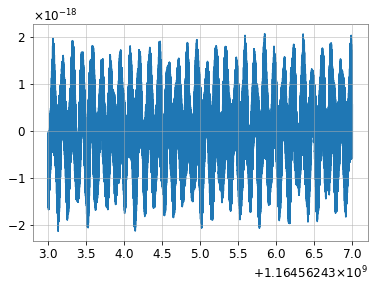

In [0]:
plt.plot(noise1)

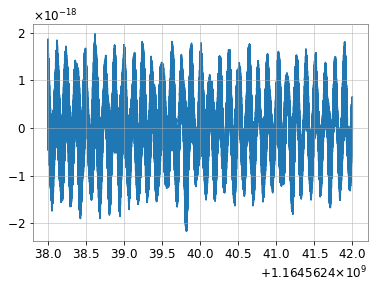

In [0]:
plt.plot(noise2)

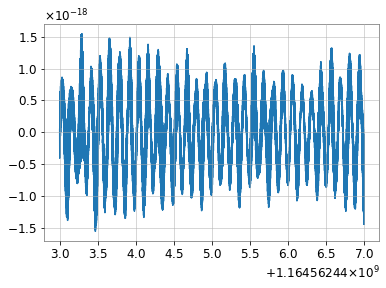

In [0]:
plt.plot(noise3)

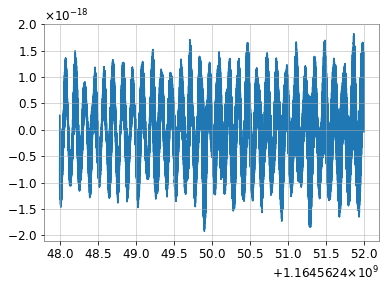

In [0]:
plt.plot(noise4)

In [0]:
#fig,axs =plt.subplots(2,1)
#a[0].plot(noise1)
#a[1].plot(noise2)
print(len(noise1),len(noise2),len(noise3),len(noise4))

16384 16384 16384 16384


In [0]:
'TaylorT1','TaylorT2', 'SpinTaylorT1','EOBNRv2' , 'SEOBNRv1', 'SEOBNRv2','SpinTaylorT4', 'SpinTaylorT5' 20-15

In [0]:
signal_hc_train=np.zeros((40000,len(noise1)))
signal_hc_test=np.zeros((30000,len(noise1)))

next_val=0

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
ls 'gdrive/My Drive/GW data'

'labels 20.csv'              labels.csv   S+GN/          'signal test.csv'
'labels834_NEW - Copy.csv'   NGN/        'S+GN 01'/      'signal train.csv'
 labels834_NEW.csv           NGN.csv      signal_hc.csv   S+NGN/


##using class

In [0]:

class signals_generation:

  def signal_param(apx,m1_max,m2_max,d_max,fl_max):

    global next_val
    
    left,k=0,0
    wb = Workbook() 
    sheet1 = wb.add_sheet('Sheet 1') 

    for m1 in range (5,m1_max,2):
      check=np.zeros(16384)
      for m2 in range (5,m2_max,2):
        for d in range(10,d_max,50):
          for fl in (20,fl_max,20):
            if (m2_max+d_max+fl_max) not in check:
              check[k]=m2_max+d_max+fl_max
              hp,hc = get_td_waveform(approximant=apx,
                                mass1=m1,mass2=m2,
                                delta_t=1.0/4096,
                                f_lower=fl,f_final=50, 
                                distance=d)
              len_hc=len(hc)
              if len_hc<=16385 :
                noise_hc_train=noise
                for j in range(len_hc):
                  signal_hc_train[next_val][j]=noise_hc_train[j]+hc[j]
                for left in range(16384-len_hc):
                  signal_hc_train[next_val][left+len_hc]=noise_hc_train[left+len_hc]
                signal_hc_train_labels=[apx,m1,m2,d,fl]
                print(signal_hc_train_labels)
                k=k+1
                next_val=next_val+1
                left=0
                sheet1.write(next_val, 0, apx)
                sheet1.write(next_val, 1, m1_max)
                sheet1.write(next_val, 2, m2_max)
                sheet1.write(next_val, 3, d_max)
                sheet1.write(next_val, 4, fl_max)
                sheet1.write(next_val, 5, 50)
                wb.save('gdrive/My Drive/GW data/signal train.csv') 

In [0]:
apx=['TaylorT1','TaylorT2', 'SpinTaylorT1','EOBNRv2' , 'SEOBNRv1', 'SEOBNRv2','SpinTaylorT4', 'SpinTaylorT5']
for i in (range(len(apx))):
  signals_generation.signal_param(apx[i],20,15,1001,121)

print(next_val-1)

## normally

##training dataset

In [0]:
wb=Workbook()
sheet1=wb.add_sheet('Sheet1')
sheet1.write(0,0,'hi')
sheet1.write(1,2,'g')
wb.save('gdrive/My Drive/GW data/signal train.csv')

In [0]:
apx=['TaylorT1', 'TaylorT2', 'SpinTaylorT1', 'SpinTaylorT4','EOBNRv2' , 'SEOBNRv1', 'SEOBNRv2', 'SpinTaylorT5']
check=np.zeros(len(noise1))
left=0
wb = Workbook() 
sheet1 = wb.add_sheet('Sheet 1') 
len_apx=len(apx)
for a in tqdm(range(len_apx)):
  check=np.zeros(len(noise1))
  k=0
  for m1 in range (5,20,2):
    for m2 in range (5,15,2):
      for d in range(10,1001,50):
        for fl in [30,60,80,120]:
          if (m1+m2+d+fl) not in check:
            check[k]=m1+m2+d+fl
            hp,hc = get_td_waveform(approximant=apx[a],
                              mass1=m1,mass2=m2,
                              delta_t=1.0/4096,
                              f_lower=fl,f_final=50, 
                              distance=d)
            len_hc=len(hc)
            if len_hc<=16385 :
              noise_hc_train1=noise1
              noise_hc_train2=noise2
              noise_hc_train3=noise3
              noise_hc_train4=noise4
              for j in range(len_hc):
                signal_hc_train[next_val][j]=noise_hc_train1[j]+hc[j]
                signal_hc_train[next_val+1][j]=noise_hc_train2[j]+hc[j]
                signal_hc_train[next_val+2][j]=noise_hc_train3[j]+hc[j]
                signal_hc_train[next_val+3][j]=noise_hc_train4[j]+hc[j]
              for left in range(16384-len_hc):
                signal_hc_train[next_val][left+len_hc]=noise_hc_train1[left+len_hc]
                signal_hc_train[next_val+1][left+len_hc]=noise_hc_train2[left+len_hc]
                signal_hc_train[next_val+2][left+len_hc]=noise_hc_train3[left+len_hc]
                signal_hc_train[next_val+3][left+len_hc]=noise_hc_train4[left+len_hc]
              #print(next_val,m1,m2,d,fl,apx[a])
              sheet1.write(next_val, 0, apx[a])
              sheet1.write(next_val, 1, m1)
              sheet1.write(next_val, 2, m2)
              sheet1.write(next_val, 3, d)
              sheet1.write(next_val, 4, fl)
              sheet1.write(next_val, 5, 50)
              sheet1.write(next_val, 6, 1)
              sheet1.write(next_val+1, 0, apx[a])
              sheet1.write(next_val+1, 1, m1)
              sheet1.write(next_val+1, 2, m2)
              sheet1.write(next_val+1, 3, d)
              sheet1.write(next_val+1, 4, fl)
              sheet1.write(next_val+1, 5, 50)
              sheet1.write(next_val+1, 6, 1)
              sheet1.write(next_val+2, 0, apx[a])
              sheet1.write(next_val+2, 1, m1)
              sheet1.write(next_val+2, 2, m2)
              sheet1.write(next_val+2, 3, d)
              sheet1.write(next_val+2, 4, fl)
              sheet1.write(next_val+2, 5, 50)
              sheet1.write(next_val+2, 6, 1)
              sheet1.write(next_val+3, 0, apx[a])
              sheet1.write(next_val+3, 1, m1)
              sheet1.write(next_val+3, 2, m2)
              sheet1.write(next_val+3, 3, d)
              sheet1.write(next_val+3, 4, fl)
              sheet1.write(next_val+3, 5, 50)
              sheet1.write(next_val+3, 6, 1)
              wb.save('gdrive/My Drive/GW data/signal train.csv')
              k=k+1
              next_val=next_val+4
              left=0 


i=next_val-4
print(i)

 62%|██████▎   | 5/8 [2:20:39<1:24:30, 1690.24s/it]

In [0]:
freq=4096 #frequency in Hz
flow = 30.0 #higher flow rates to higer noise amplitude 
delta_f = 1.0 / 16
flen = int((freq/2) / delta_f) + 1
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
n=4
delta_t = 1 / freq 
tsamples = int(n/ delta_t)

wb = Workbook() 
sheet2 = wb.add_sheet('Sheet 2') 
for j in tqdm(range(i,2*i+1,1)):
  signal_hc_train[j]=1e3*pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=200)
  sheet2.write(j, 0, 0)
  sheet2.write(j, 1, 0)
  sheet2.write(j, 2, 0)
  sheet2.write(j, 3, 0)
  sheet2.write(j, 4, 0)
  sheet2.write(j, 5, 0)
  sheet2.write(j, 6, 0)
  wb.save('gdrive/My Drive/GW data/signal train.csv') 

100%|██████████| 7391/7391 [17:48<00:00,  5.54it/s]


In [0]:
print(j-1)

14779


##testing dataset

In [0]:
next_val=0
apx=['TaylorT1', 'TaylorT2', 'SpinTaylorT1', 'SpinTaylorT4']
check=np.zeros(len(noise1))
left=0
wb = Workbook() 
sheet3 = wb.add_sheet('Sheet 1') 
len_apx=len(apx)
for a in tqdm(range(len_apx)):
  check=np.zeros(len(noise1))
  k=0
  for m1 in range (5,20,2):
    for m2 in range (5,15,2):
      for d in range(10,1001,50):
        for fl in [30,60,80,120]:
          if (m1+m2+d+fl) not in check:
            check[k]=m1+m2+d+fl
            hp,hc = get_td_waveform(approximant=apx[a],
                              mass1=m1,mass2=m2,
                              delta_t=1.0/4096,
                              f_lower=fl,f_final=50, 
                              distance=d)
            len_hc=len(hc)
            if len_hc<=16385 :
              noise_hc_test1=noise1
              noise_hc_test2=noise2
              for j in range(len_hc):
                signal_hc_test[next_val][j]=noise_hc_test1[j]+hc[j]
                signal_hc_test[next_val+1][j]=noise_hc_test2[j]+hc[j]
              for left in range(16384-len_hc):
                signal_hc_test[next_val][left+len_hc]=noise_hc_test1[left+len_hc]
                signal_hc_test[next_val+1][left+len_hc]=noise_hc_test2[left+len_hc]
              #print(next_val,m1,m2,d,fl,apx[a])
              sheet3.write(next_val, 0, apx[a])
              sheet3.write(next_val, 1, m1)
              sheet3.write(next_val, 2, m2)
              sheet3.write(next_val, 3, d)
              sheet3.write(next_val, 4, fl)
              sheet3.write(next_val, 5, 50)
              sheet3.write(next_val, 6, 1)
              sheet3.write(next_val+1, 0, apx[a])
              sheet3.write(next_val+1, 1, m1)
              sheet3.write(next_val+1, 2, m2)
              sheet3.write(next_val+1, 3, d)
              sheet3.write(next_val+1, 4, fl)
              sheet3.write(next_val+1, 5, 50)
              sheet3.write(next_val+1, 6, 1)
              wb.save('gdrive/My Drive/GW data/signal test.csv')
              k=k+1
              next_val=next_val+2
              left=0 


i=next_val-2



In [0]:
freq=4096 #frequency in Hz
flow = 30.0 #higher flow rates to higer noise amplitude 
delta_f = 1.0 / 16
flen = int((freq/2) / delta_f) + 1
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
n=4
delta_t = 1 / freq 
tsamples = int(n/ delta_t)

wb = Workbook() 
sheet4 = wb.add_sheet('Sheet 2') 
for j in tqdm(range(i,2*i+1,1)):
  signal_hc_train[j]=1e3*pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=200)
  sheet4.write(j, 0, 0)
  sheet4.write(j, 1, 0)
  sheet4.write(j, 2, 0)
  sheet4.write(j, 3, 0)
  sheet4.write(j, 4, 0)
  sheet4.write(j, 5, 0)
  sheet4.write(j, 6, 0)
  wb.save('gdrive/My Drive/GW data/signal test.csv') 

In [0]:
print(j-1)

14779


In [0]:
signal_hc_test[222]

array([0., 0., 0., ..., 0., 0., 0.])

In [0]:
print(len(signal_hc_test),next_val)

20000 557


##testing waveforms

In [0]:
from pycbc.waveform import td_approximants, fd_approximants

# List of td approximants that are available
print(td_approximants())
print(len(td_approximants()))
# List of fd approximants that are currently available
print(fd_approximants())
print(len(fd_approximants()))

TaylorT1


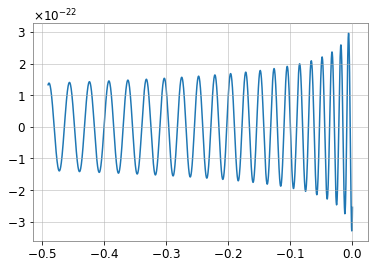

TaylorT2


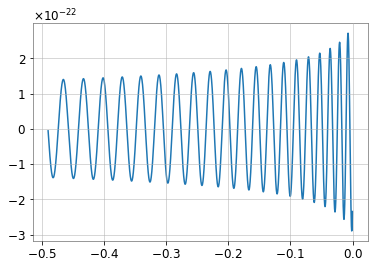

TaylorT3


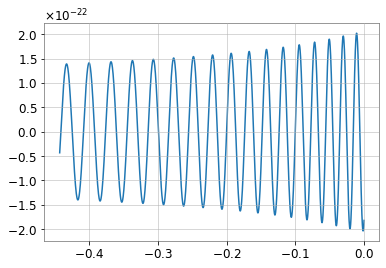

SEOBNRv1


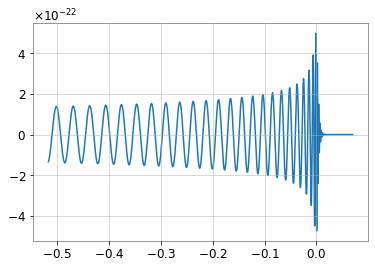

SEOBNRv2


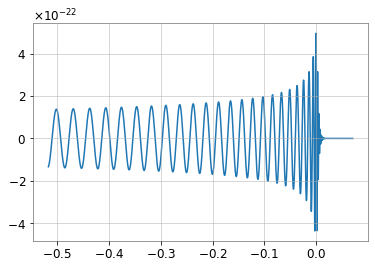

SEOBNRv2_opt


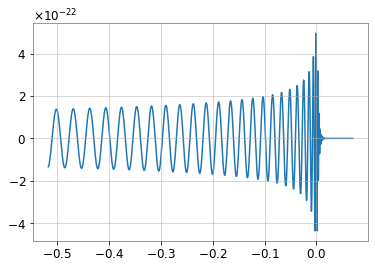

SEOBNRv3


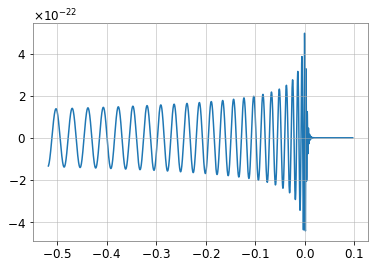

SEOBNRv3_pert


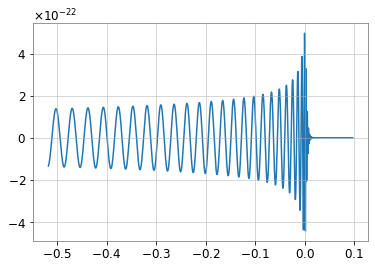

SEOBNRv3_opt


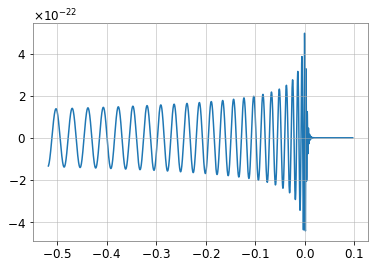

SEOBNRv3_opt_rk4


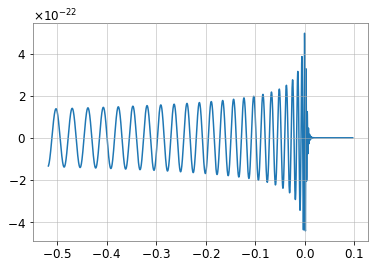

SEOBNRv4


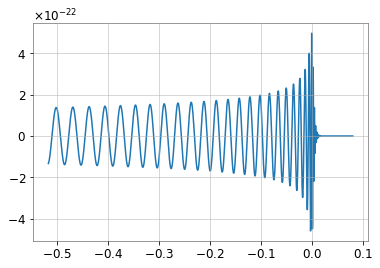

SEOBNRv4_opt


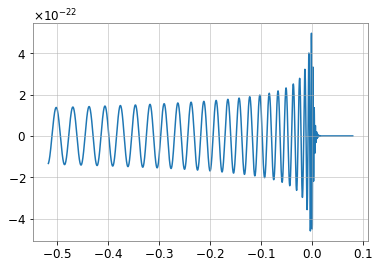

SEOBNRv4P


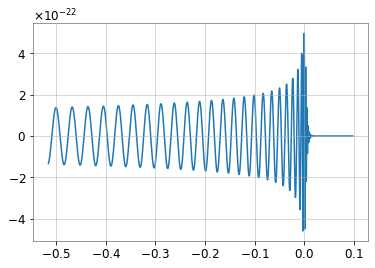

SEOBNRv2T


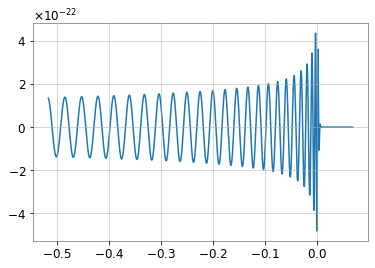

SEOBNRv4T


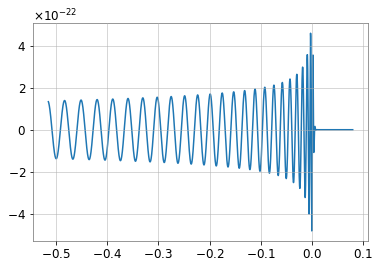

In [0]:
import pylab
from pycbc.waveform import get_td_waveform

for apx in ['TaylorT1', 'TaylorT2', 'TaylorT3', 'SEOBNRv1', 'SEOBNRv2', 'SEOBNRv2_opt', 'SEOBNRv3', 'SEOBNRv3_pert', 'SEOBNRv3_opt', 'SEOBNRv3_opt_rk4', 'SEOBNRv4', 'SEOBNRv4_opt', 'SEOBNRv4P', 'SEOBNRv2T', 'SEOBNRv4T']:
    hp,hc = get_td_waveform(approximant=apx,
                      mass1=21,mass2=21,
                      delta_t=1.0/4096,
                      f_lower=30,f_final=50, 
                      distance=1000)

    pylab.plot(hp.sample_times, hp, label=apx)
    print(apx)
    pylab.show()


In [0]:
['TaylorT1', 'TaylorT2', 'TaylorT3', 'SpinTaylorT1', 'SpinTaylorT4', 'SpinTaylorT5' ,'EOBNRv2' , 'SEOBNRv1', 'SEOBNRv2', 'SEOBNRv2_opt', 'SEOBNRv3', 'SEOBNRv3_pert', 'SEOBNRv3_opt''SEOBNRv3_opt_rk4', 'SEOBNRv4', 'SEOBNRv4_opt', 'SEOBNRv4P',  'SEOBNRv2T', 'SEOBNRv4T','IMRPhenomA', 'IMRPhenomB', 'IMRPhenomC', 'IMRPhenomD', 'IMRPhenomHM', 'IMRPhenomPv2','IMRPhenomPv2_NRTidal', 'TaylorEt', 'TaylorT4','IMRPhenomD_NRTidal', 'SpinTaylorF2', 'SpinTaylorF2_SWAPPER' ]

#Glitch

https://pywavelets.readthedocs.io/en/latest/ref/cwt.html
https://towardsdatascience.com/what-is-wavelet-and-how-we-use-it-for-data-science-d19427699cef

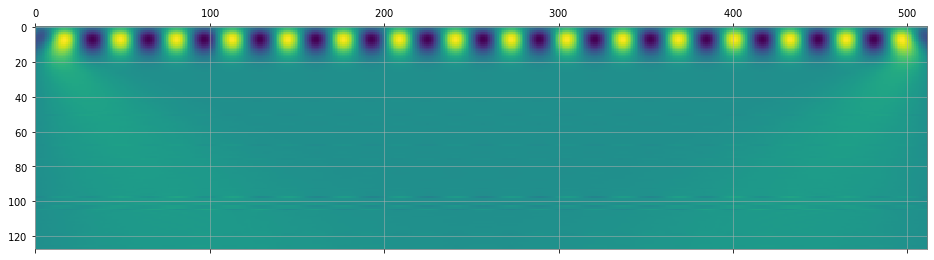

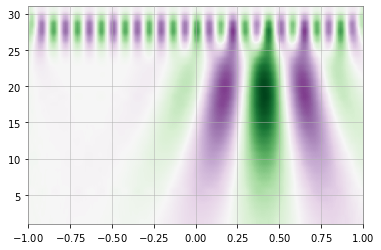

In [0]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(512)
y = np.sin(2*np.pi*x/32)
coef, freqs=pywt.cwt(y,np.arange(1,129),'gaus1')
plt.matshow(coef) # doctest: +SKIP
plt.show() # doctest: +SKIP
import pywt
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(-1, 1, 200, endpoint=False)
sig  = np.cos(2 * np.pi * 7 * t) + np.real(np.exp(-7*(t-0.4)**2)*np.exp(1j*2*np.pi*2*(t-0.4)))
widths = np.arange(1, 31)
cwtmatr, freqs = pywt.cwt(sig, widths, 'mexh')
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())  # doctest: +SKIP
plt.show() # doctest: +SKIP

In [0]:
wavlist = pywt.wavelist(kind='continuous',)
print(wavlist)

['cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'mexh', 'morl', 'shan']


In [0]:
import pywt
def wavelets(wave):
  wav = pywt.ContinuousWavelet(wave)
  width = wav.upper_bound - wav.lower_bound

  scales = [55]

  max_len = int(np.max(scales)*width + 1)
  t = np.arange(max_len)
  for n, scale in enumerate(scales):
      int_psi, x = pywt.integrate_wavelet(wav, precision=25)
      step = x[1] - x[0]
      j = np.floor(
          np.arange(scale * width + 1) / (scale * step))
      if np.max(j) >= np.size(int_psi):
          j = np.delete(j, np.where((j >= np.size(int_psi)))[0])
      j = j.astype(np.int)
      int_psi /= np.abs(int_psi).max()
      filt = int_psi[j][::-1]
      nt = len(filt)
      t = np.linspace(-nt//2, nt//2, nt)
      plt.plot(t, filt.real)
      plt.show()
      return t,filt.real

In [0]:
def spec(a):
  f, time, Sxx = signal.spectrogram(a, 1024)
  plt.pcolormesh(time, f, Sxx)
  plt.ylabel('Frequency [Hz]')
  plt.xlabel('Time [sec]')
  plt.show()

#Mexican Hat Wavelet air compressor

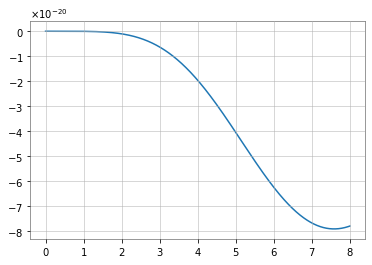

(array([[2.44779559e-46, 2.43070442e-46, 2.37472345e-46, ...,
         1.03785942e-39, 1.03637409e-39, 1.02908409e-39],
        [1.23870553e-46, 1.23097127e-46, 1.20508351e-46, ...,
         5.25254677e-40, 5.24499394e-40, 5.20807243e-40],
        [9.46998899e-52, 1.18814123e-51, 2.20733332e-51, ...,
         4.12812664e-45, 4.13787969e-45, 4.21723858e-45],
        ...,
        [1.04387853e-61, 1.03204255e-61, 9.96721685e-62, ...,
         4.42454677e-55, 4.41840981e-55, 4.38757628e-55],
        [2.60773278e-62, 2.57818226e-62, 2.49007273e-62, ...,
         1.10530382e-55, 1.10377108e-55, 1.09607010e-55],
        [1.01201196e-68, 1.25779781e-67, 9.71994117e-67, ...,
         2.94677337e-63, 2.47792637e-62, 1.32752052e-61]]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,
         36.,  40.,  44.,  48.,  52.,  56.,  60.,  64.,  68.,
         72.,  76.,  80.,  84.,  88.,  92.,  96., 100., 104.,
        108., 112., 116., 120., 124., 128., 132., 136., 140.,
        144., 148

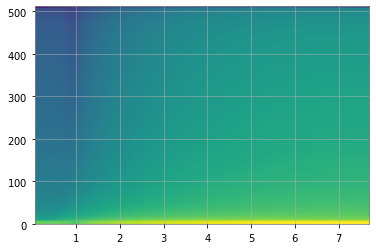

In [0]:
x=np.arange(0,8,1e-3)
y=np.zeros(len(x))
y=10e-24*(5/np.sqrt(3)*(np.pi**(.25)))*np.exp(-x**2/23)*(1-x**5)
plt.plot(x,y)
plt.show()
plt.specgram(y,Fs=1024)

#Morlet waveform maybe compressor

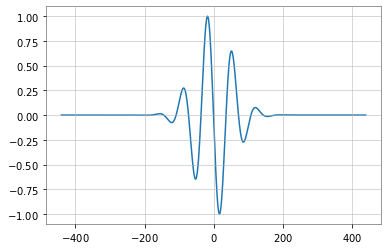

(array([[3.67540028e-10, 5.38037073e-07, 7.54128340e-08,
         1.73558303e-06, 9.50110383e-08],
        [2.18113158e-10, 4.16692210e-06, 1.31205879e-04,
         1.25860832e-04, 9.87374549e-07],
        [1.10508319e-11, 2.02110515e-05, 4.40816249e-03,
         3.30039119e-03, 5.29251410e-06],
        ...,
        [1.76881769e-22, 9.22763045e-18, 1.96555123e-17,
         6.17390535e-20, 9.88586707e-18],
        [1.47116514e-22, 6.60419722e-18, 1.32455346e-17,
         1.71366788e-17, 9.97749869e-18],
        [6.85772294e-23, 2.56830749e-18, 8.75988595e-18,
         2.83522597e-19, 5.18462912e-18]]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,
         36.,  40.,  44.,  48.,  52.,  56.,  60.,  64.,  68.,
         72.,  76.,  80.,  84.,  88.,  92.,  96., 100., 104.,
        108., 112., 116., 120., 124., 128., 132., 136., 140.,
        144., 148., 152., 156., 160., 164., 168., 172., 176.,
        180., 184., 188., 192., 196., 200., 204., 208., 212.,
        216., 220.,

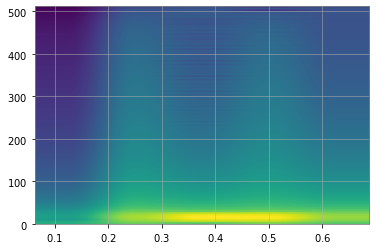

In [0]:
t,y=wavelets('morl')
plt.specgram(y,Fs=1024)

#cusp

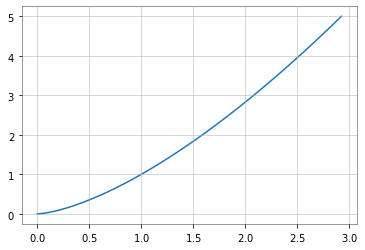

(array([[1.03133550e-02, 2.67170962e-02, 4.61064099e-02, ...,
         1.27279882e+00, 1.32016316e+00, 1.36795619e+00],
        [5.99149189e-03, 1.39755924e-02, 2.36721982e-02, ...,
         6.43946990e-01, 6.67906379e-01, 6.92082688e-01],
        [2.73917531e-05, 1.79648774e-05, 1.38480795e-05, ...,
         7.05730818e-06, 7.17519845e-06, 7.29667104e-06],
        ...,
        [3.75276196e-18, 1.08838002e-17, 1.93096289e-17, ...,
         5.43867856e-16, 5.64110734e-16, 5.84536760e-16],
        [1.44495735e-18, 2.74644659e-18, 4.84323392e-18, ...,
         1.35868108e-16, 1.40924953e-16, 1.46027553e-16],
        [3.38465358e-19, 1.84624597e-20, 1.30481390e-20, ...,
         2.36152065e-21, 2.31872612e-21, 2.27781383e-21]]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,
         36.,  40.,  44.,  48.,  52.,  56.,  60.,  64.,  68.,
         72.,  76.,  80.,  84.,  88.,  92.,  96., 100., 104.,
        108., 112., 116., 120., 124., 128., 132., 136., 140.,
        144., 148

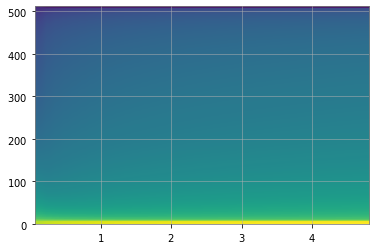

In [0]:
x=np.arange(0,5,.001)
y,val=np.zeros(len(x)),np.zeros(len(x))
y=x**(2/3)
plt.plot(y,x)
plt.show()
plt.specgram(y,Fs=1024)

#chirping sine gaussian

3927


(array([[1.29717055e-05, 1.52439543e-10, 2.41052313e-06, ...,
         7.68818631e-14, 5.68903584e-13, 7.51356484e-14],
        [2.51439161e-04, 6.39491149e-05, 5.51164472e-05, ...,
         1.74867540e-13, 1.14878049e-12, 1.52161277e-13],
        [3.24298585e-02, 1.33386741e-02, 2.97044651e-03, ...,
         2.39276931e-13, 1.18221919e-12, 1.57928199e-13],
        ...,
        [8.54553715e-17, 1.33723963e-16, 5.63962077e-19, ...,
         2.86778992e-14, 7.24282674e-15, 6.16734694e-14],
        [7.63018636e-17, 1.20123751e-16, 2.34969342e-19, ...,
         2.86085009e-14, 6.71053109e-15, 6.07848282e-14],
        [3.66275205e-17, 5.77987098e-17, 6.69593244e-20, ...,
         1.42926990e-14, 3.26688721e-15, 3.02448790e-14]]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,
         36.,  40.,  44.,  48.,  52.,  56.,  60.,  64.,  68.,
         72.,  76.,  80.,  84.,  88.,  92.,  96., 100., 104.,
        108., 112., 116., 120., 124., 128., 132., 136., 140.,
        144., 148

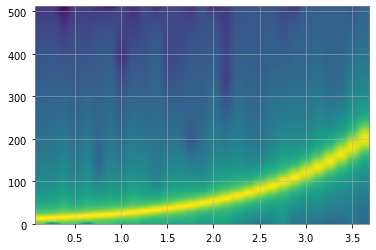

In [0]:
x=np.arange(0,np.pi/4,.0002)
print(len(x))
k=55
y=np.sin(np.pi*100*(k**x-1)/np.log(k))
plt.specgram(y,Fs=1024)

##koi fish & rain drop

In [0]:
x=np.arange(0,2*np.pi,.001)
y=np.zeros(len(x))

##scattering

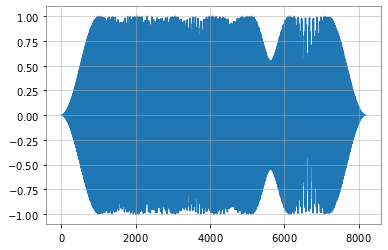

(array([[5.70347772e-13, 1.56465518e-12, 3.59465942e-12, ...,
         5.71800805e-11, 4.69663614e-12, 1.02059061e-11],
        [1.17433452e-12, 3.27986581e-12, 7.65218789e-12, ...,
         1.28431594e-10, 1.38986079e-11, 2.17109754e-11],
        [1.27948405e-12, 3.75660090e-12, 9.12562450e-12, ...,
         1.76168311e-10, 2.92698172e-11, 2.60652081e-11],
        ...,
        [4.22350288e-17, 1.71044736e-16, 1.25508176e-17, ...,
         1.38497150e-17, 3.32738382e-17, 2.03188963e-17],
        [4.28066357e-17, 1.74094010e-16, 2.67957010e-18, ...,
         6.40869292e-18, 3.44192123e-17, 2.03193686e-17],
        [2.11550620e-17, 8.34264455e-17, 4.64777759e-19, ...,
         1.63598853e-18, 1.59037486e-17, 1.01388930e-17]]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,
         36.,  40.,  44.,  48.,  52.,  56.,  60.,  64.,  68.,
         72.,  76.,  80.,  84.,  88.,  92.,  96., 100., 104.,
        108., 112., 116., 120., 124., 128., 132., 136., 140.,
        144., 148

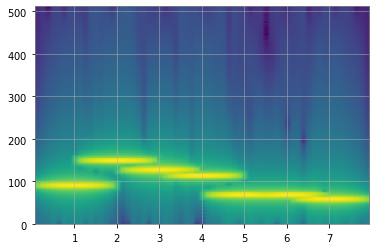

In [0]:
rng = np.random.RandomState(42)
T = 2 ** 13
num_notes = 2 * (4 - 1) + 1
support = T // 4
half_support = support // 2

base_freq = 0.1 * rng.rand(num_notes) + 0.05
phase = 2 * np.pi * rng.rand(num_notes)
window = np.hanning(support)
x = np.zeros(T, dtype='float32')
t = np.arange(0, support)
u = 2 * np.pi * t
for i in range(num_notes):
    ind_start = i * half_support
    note = np.zeros(support)
    for k in range(1):
        note += (np.power(.9, k) *
                  np.cos(u * (k + 1) * base_freq[i] + phase[i]))
    x[ind_start:ind_start + support] += note * window
plt.plot(x)
plt.show()
plt.specgram(x,Fs=1024)

In [0]:
def generate_harmonic_signal(T, num_intervals=4, gamma=0.9, random_state=42):
    """
    Generates a harmonic signal, which is made of piecewise constant notes
    (of random fundamental frequency), with half overlap
    """
    rng = np.random.RandomState(random_state)
    num_notes = 2 * (num_intervals - 1) + 1
    support = T // num_intervals
    half_support = support // 2

    base_freq = 0.1 * rng.rand(num_notes) + 0.05
    phase = 2 * np.pi * rng.rand(num_notes)
    window = np.hanning(support)
    x = np.zeros(T, dtype='float32')
    t = np.arange(0, support)
    u = 2 * np.pi * t
    for i in range(num_notes):
        ind_start = i * half_support
        note = np.zeros(support)
        for k in range(1):
            note += (np.power(gamma, k) *
                     np.cos(u * (k + 1) * base_freq[i] + phase[i]))
        x[ind_start:ind_start + support] += note * window
    # Transform x into a torch Tensor
    x = torch.from_numpy(x[np.newaxis])
    return x



In [0]:
T = 2 ** 13
x = generate_harmonic_signal(T)
plt.plot(x.numpy().ravel())
plt.title("Original signal")

In [0]:
plt.specgram(x.numpy().ravel(), Fs=1024)
plt.title("Time-Frequency spectrogram of signal")

Text(0.5, 1.0, '|FFT(filter)|$^2$')

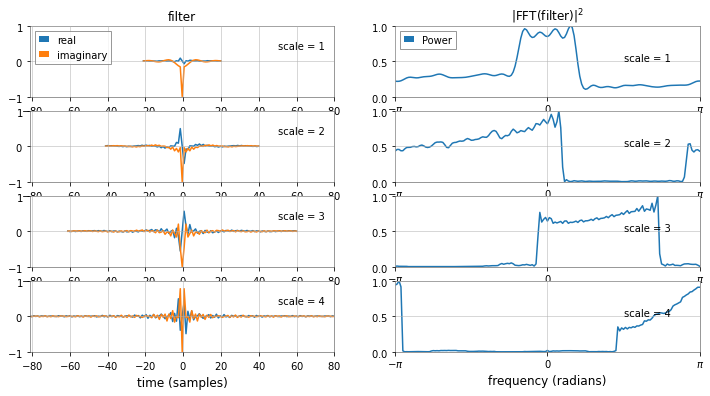

In [0]:
import pywt
wav = pywt.ContinuousWavelet('shan1.2-2.5')
width = wav.upper_bound - wav.lower_bound

scales = [1, 2, 3, 4]

max_len = int(np.max(scales)*width + 1)
t = np.arange(max_len)
fig, axes = plt.subplots(len(scales), 2, figsize=(12, 6))
for n, scale in enumerate(scales):

    # The following code is adapted from the internals of cwt
    int_psi, x = pywt.integrate_wavelet(wav, precision=10)
    step = x[1] - x[0]
    j = np.floor(
        np.arange(scale * width + 1) / (scale * step))
    if np.max(j) >= np.size(int_psi):
        j = np.delete(j, np.where((j >= np.size(int_psi)))[0])
    j = j.astype(np.int)

    # normalize int_psi for easier plotting
    int_psi /= np.abs(int_psi).max()

    # discrete samples of the integrated wavelet
    filt = int_psi[j][::-1]

    # The CWT consists of convolution of filt with the signal at this scale
    # Here we plot this discrete convolution kernel at each scale.

    nt = len(filt)
    t = np.linspace(-nt//2, nt//2, nt)
    axes[n, 0].plot(t, filt.real, t, filt.imag)
    axes[n, 0].set_xlim([-max_len//2, max_len//2])
    axes[n, 0].set_ylim([-1, 1])
    axes[n, 0].text(50, 0.35, 'scale = {}'.format(scale))

    f = np.linspace(-np.pi, np.pi, max_len)
    filt_fft = np.fft.fftshift(np.fft.fft(filt, n=max_len))
    filt_fft /= np.abs(filt_fft).max()
    axes[n, 1].plot(f, np.abs(filt_fft)**2)
    axes[n, 1].set_xlim([-np.pi, np.pi])
    axes[n, 1].set_ylim([0, 1])
    axes[n, 1].set_xticks([-np.pi, 0, np.pi])
    axes[n, 1].set_xticklabels([r'$-\pi$', '0', r'$\pi$'])
    axes[n, 1].grid(True, axis='x')
    axes[n, 1].text(np.pi/2, 0.5, 'scale = {}'.format(scale))

axes[n, 0].set_xlabel('time (samples)')
axes[n, 1].set_xlabel('frequency (radians)')
axes[0, 0].legend(['real', 'imaginary'], loc='upper left')
axes[0, 1].legend(['Power'], loc='upper left')
axes[0, 0].set_title('filter')
axes[0, 1].set_title(r'|FFT(filter)|$^2$')

# jUST CHECKING

(array([[3.40440415e-08, 1.01772266e-07, 1.72463329e-07, ...,
         1.68962849e-07, 2.12146194e-07, 2.06959678e-07],
        [2.90325708e-07, 4.46064861e-07, 6.08616981e-07, ...,
         6.00567726e-07, 6.99866616e-07, 6.87940369e-07],
        [2.42155890e-06, 2.67073341e-06, 2.93080831e-06, ...,
         2.91792993e-06, 3.07680297e-06, 3.05772159e-06],
        ...,
        [3.11447481e-16, 2.17404986e-16, 1.19248507e-16, ...,
         1.24109009e-16, 6.41477649e-17, 7.13493856e-17],
        [3.05580192e-16, 1.97436627e-16, 8.45622121e-17, ...,
         9.01515361e-17, 2.11994586e-17, 2.94809133e-17],
        [1.51813347e-16, 9.53935007e-17, 3.65055113e-17, ...,
         3.94215209e-17, 3.44837695e-18, 7.76891644e-18]]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,
         36.,  40.,  44.,  48.,  52.,  56.,  60.,  64.,  68.,
         72.,  76.,  80.,  84.,  88.,  92.,  96., 100., 104.,
        108., 112., 116., 120., 124., 128., 132., 136., 140.,
        144., 148

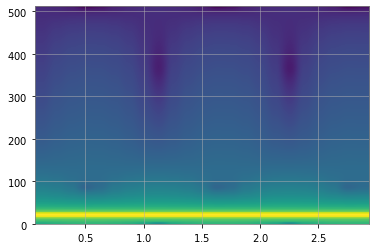

In [0]:
x=np.arange(0,np.pi,1e-3)
y1=np.sin(60*x)
y2=np.sin(120*x)
plt.specgram(y2,Fs=1024)


#Koi fish

In [0]:
x=np.linspace(.1,4,1e3)
y= np.zeros(len(x))
for i in range(10,5000,1):
  for j in range(i,len(x)-i,1):
    y[j]=np.sin(j*i)+y[j]#+np.random.rand(1)*.1
plt.plot(x,y)
print(j)
plt.show()
spec(y)

#Frequency B-Spline Wavelets

(array([[5.09265497e-02, 2.49051677e-02, 1.63297121e-02, ...,
         2.87802688e-02, 3.44188639e-02, 3.82406368e-02],
        [9.91986549e-02, 4.49233540e-02, 2.79500502e-02, ...,
         5.25498399e-02, 5.87365890e-02, 6.55215665e-02],
        [1.85392827e-02, 8.81155950e-03, 5.58451850e-03, ...,
         1.07219295e-02, 1.18830436e-02, 1.32158258e-02],
        ...,
        [1.14871206e-16, 3.94925422e-17, 2.41435710e-17, ...,
         4.03337174e-17, 4.70401520e-17, 5.18267462e-17],
        [4.55524973e-17, 1.16698002e-17, 6.29325695e-18, ...,
         1.04482581e-17, 1.17631388e-17, 1.31519871e-17],
        [1.12357210e-17, 1.20251786e-18, 1.74581654e-19, ...,
         2.48212890e-19, 7.93913116e-21, 1.36622790e-19]]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,
         36.,  40.,  44.,  48.,  52.,  56.,  60.,  64.,  68.,
         72.,  76.,  80.,  84.,  88.,  92.,  96., 100., 104.,
        108., 112., 116., 120., 124., 128., 132., 136., 140.,
        144., 148

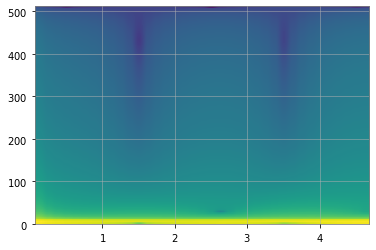

In [0]:
x=np.arange(.1,5,1e-3)
y=np.zeros(len(x))
C,B,M=.1,22,3
y=(np.sqrt(B)*np.sin(np.pi*B*x/M)*np.exp(2*np.pi*C*x))/(np.pi*B*x/M)
plt.specgram(y,Fs=1024)

#Shannon Wavelets


(array([[3.68121042e-06, 1.65477450e-08, 3.51509693e-09, ...,
         2.34253034e-06, 3.96393238e-06, 5.61858051e-06],
        [4.89277804e-03, 2.25776631e-03, 1.42132181e-03, ...,
         2.66997476e-03, 2.94736523e-03, 3.26551040e-03],
        [1.54208894e-02, 7.06101895e-03, 4.41802644e-03, ...,
         8.38047354e-03, 9.32939254e-03, 1.03956123e-02],
        ...,
        [2.21658812e-17, 6.44883551e-18, 3.58958712e-18, ...,
         6.43564126e-18, 7.28776291e-18, 8.21031202e-18],
        [5.55123054e-18, 2.27057251e-18, 1.97743414e-18, ...,
         3.00669349e-18, 2.36099073e-18, 2.08591403e-18],
        [9.76375259e-21, 4.39669982e-19, 7.20317041e-19, ...,
         9.32432864e-19, 3.60184492e-19, 2.32325979e-20]]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,
         36.,  40.,  44.,  48.,  52.,  56.,  60.,  64.,  68.,
         72.,  76.,  80.,  84.,  88.,  92.,  96., 100., 104.,
        108., 112., 116., 120., 124., 128., 132., 136., 140.,
        144., 148

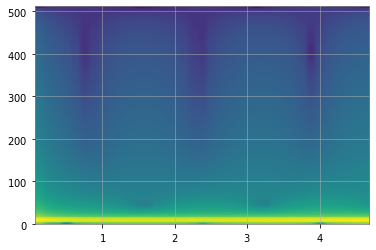

In [0]:
x=np.arange(.1,5,1e-3)
y=np.zeros(len(x))
C,B=.1,15
y=(np.sqrt(B)*np.sin(np.pi*B*x)*np.exp(2*np.pi*C*x))/(np.pi*B*x)
plt.specgram(y,Fs=1024)

#1080 lines

In [0]:
a=TimeSeries.fetch_open_data('H1', 1164677120, 1164677124)

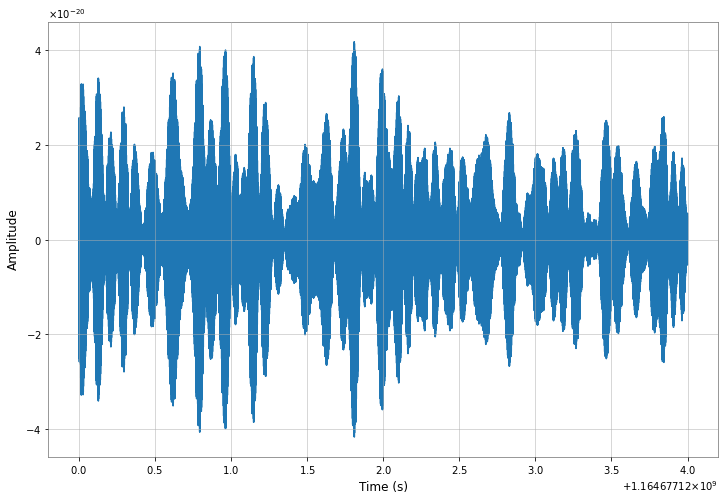

(array([[1.43332983e-53, 2.56213108e-55, 7.24722742e-54, ...,
         5.64647928e-57, 6.25577959e-55, 1.26853571e-54],
        [2.87769503e-53, 5.42827992e-55, 1.45312296e-53, ...,
         1.44569650e-56, 1.26226580e-54, 2.54674168e-54],
        [2.91101468e-53, 6.34797567e-55, 1.46422402e-53, ...,
         2.40375220e-56, 1.29594738e-54, 2.57663419e-54],
        ...,
        [1.17658477e-54, 7.97445781e-54, 3.20731330e-53, ...,
         1.56289257e-55, 2.08960948e-53, 3.64941028e-55],
        [1.14549252e-54, 7.64727137e-54, 3.16816334e-53, ...,
         1.54135254e-55, 2.07651832e-53, 3.60259976e-55],
        [5.67598877e-55, 3.76939428e-54, 1.57758861e-53, ...,
         7.67106419e-56, 1.03608565e-53, 1.79354639e-55]]),
 array([   0.,   16.,   32.,   48.,   64.,   80.,   96.,  112.,
         128.,  144.,  160.,  176.,  192.,  208.,  224.,  240.,
         256.,  272.,  288.,  304.,  320.,  336.,  352.,  368.,
         384.,  400.,  416.,  432.,  448.,  464.,  480.,  496.,
         

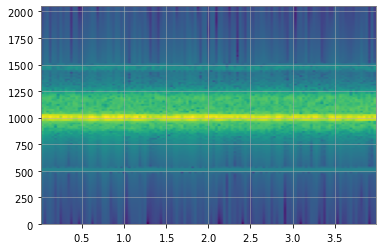

In [0]:
from gwpy.signal import filter_design
bp = filter_design.bandpass(900, 1200, a.sample_rate)
notches = [filter_design.notch(line, a.sample_rate) for line in (60, 120, 180)]
zpk = filter_design.concatenate_zpks(bp, *notches)
hfilt = a.filter(zpk, filtfilt=True)
plt.figure(figsize=(12,8))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(a.times,hfilt)
plt.show()
plt.specgram(hfilt,Fs=4096)

#1400 Ripples

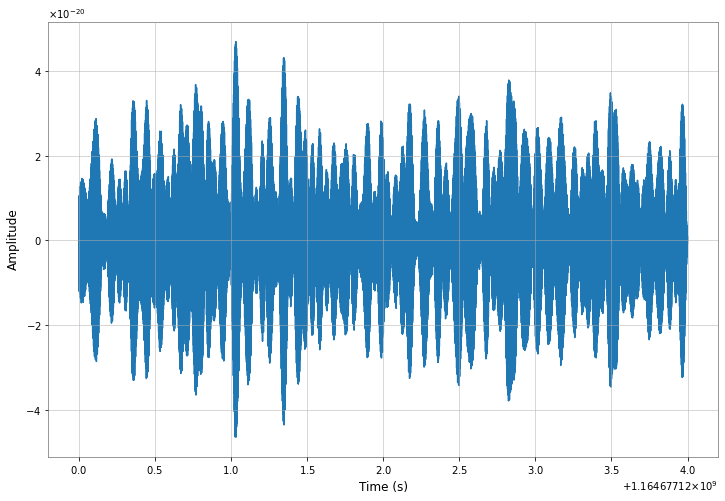

(array([[1.76883138e-55, 1.11025865e-54, 2.19878641e-55, ...,
         3.28058836e-55, 3.52497368e-55, 7.34860326e-56],
        [3.54414611e-55, 2.22371209e-54, 4.41259248e-55, ...,
         6.58761028e-55, 7.07907278e-55, 1.47200251e-55],
        [3.56366063e-55, 2.23332058e-54, 4.45776656e-55, ...,
         6.66709590e-55, 7.16671186e-55, 1.47886379e-55],
        ...,
        [4.78731256e-52, 1.94674885e-53, 4.01103018e-53, ...,
         4.20348047e-54, 1.07696418e-51, 9.27787093e-53],
        [4.46042567e-52, 1.45551714e-53, 2.43412726e-53, ...,
         2.46582897e-54, 1.03371718e-51, 8.81372744e-53],
        [2.17849014e-52, 6.47467464e-54, 9.58117955e-54, ...,
         9.47504978e-55, 5.09806883e-52, 4.33233375e-53]]),
 array([   0.,   16.,   32.,   48.,   64.,   80.,   96.,  112.,
         128.,  144.,  160.,  176.,  192.,  208.,  224.,  240.,
         256.,  272.,  288.,  304.,  320.,  336.,  352.,  368.,
         384.,  400.,  416.,  432.,  448.,  464.,  480.,  496.,
         

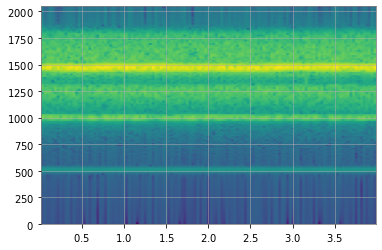

In [0]:
from gwpy.signal import filter_design
bp = filter_design.bandpass(1200, 1800, a.sample_rate)
notches = [filter_design.notch(line, a.sample_rate) for line in range(1300,1400)]
zpk = filter_design.concatenate_zpks(bp, *notches)
hfilt = a.filter(zpk, filtfilt=True)
plt.figure(figsize=(12,8))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(a.times,hfilt)
plt.show()
plt.specgram(hfilt,Fs=4096)

#AC

In [0]:
a=TimeSeries.fetch_open_data('H1', 1137238016, 1137238018)

(array([[1.37402851e-45, 1.33582277e-46, 6.41943417e-47, ...,
         1.87586828e-46, 2.00302059e-46, 1.50396583e-45],
        [2.51260841e-44, 6.05044088e-45, 2.03326306e-45, ...,
         6.55150279e-45, 1.07654221e-44, 2.73701892e-44],
        [7.30130418e-43, 7.82533755e-44, 2.66545282e-44, ...,
         1.26929158e-43, 2.07589927e-43, 8.30894838e-43],
        ...,
        [3.28384684e-57, 9.95221619e-58, 3.80325241e-59, ...,
         2.43701978e-59, 7.12402034e-58, 2.50037674e-57],
        [3.27883953e-57, 9.87710264e-58, 3.92772955e-59, ...,
         2.53443656e-59, 7.00886340e-58, 2.49126968e-57],
        [1.63858429e-57, 4.92605271e-58, 1.98523352e-59, ...,
         1.28496093e-59, 3.48531022e-58, 1.24411543e-57]]),
 array([ 0.       ,  0.5859375,  1.171875 ,  1.7578125,
         2.34375  ,  2.9296875,  3.515625 ,  4.1015625,
         4.6875   ,  5.2734375,  5.859375 ,  6.4453125,
         7.03125  ,  7.6171875,  8.203125 ,  8.7890625,
         9.375    ,  9.9609375, 10.546875

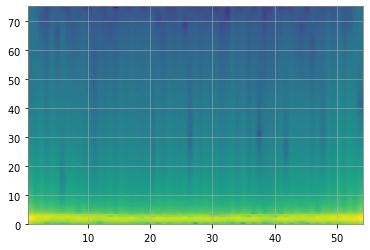

In [0]:
from gwpy.signal import filter_design
bp = filter_design.bandpass(40, 60, a.sample_rate)
notches = [filter_design.notch(line, a.sample_rate) for line in range(60,1000)]
zpk = filter_design.concatenate_zpks(bp, *notches)
hfilt = a.filter(zpk, filtfilt=True)
plt.specgram(hfilt,Fs=150)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=101).
  """


(array([[2.42614134e-07],
        [4.87710709e-07],
        [4.93967037e-07],
        [5.04810048e-07],
        [5.20268439e-07],
        [5.39725613e-07],
        [5.64566920e-07],
        [5.93622080e-07],
        [6.28018214e-07],
        [6.67879803e-07],
        [7.12686954e-07],
        [7.64264036e-07],
        [8.21330524e-07],
        [8.85486851e-07],
        [9.57091112e-07],
        [1.03562795e-06],
        [1.12373670e-06],
        [1.21994883e-06],
        [1.32657382e-06],
        [1.44452149e-06],
        [1.57321712e-06],
        [1.71672589e-06],
        [1.87346337e-06],
        [2.04683703e-06],
        [2.23899218e-06],
        [2.44941027e-06],
        [2.68459693e-06],
        [2.94342744e-06],
        [3.23117715e-06],
        [3.55266669e-06],
        [3.90843337e-06],
        [4.30907342e-06],
        [4.75623933e-06],
        [5.25912480e-06],
        [5.82814619e-06],
        [6.47006126e-06],
        [7.20186405e-06],
        [8.03680997e-06],
        [8.9

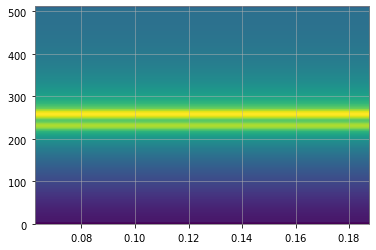

In [0]:
x=np.linspace(0,100,101)
y=np.zeros(len(x))
for i in range(30,35,3):
  y=np.add(np.sin(i*x),np.random.rand(1)*y)
plt.specgram(y,Fs=1024)

#Blip

In [0]:
a=TimeSeries.fetch_open_data('H1', 1136009216, 1136009220)

(array([[1.58356250e-45, 3.85583117e-46, 2.18567747e-46, ...,
         9.49812803e-48, 2.98809225e-51, 1.29645347e-48],
        [8.41387671e-46, 1.59130883e-44, 4.26419490e-45, ...,
         1.73853484e-44, 1.37892945e-44, 1.82967440e-44],
        [6.10906276e-44, 8.62055637e-44, 6.29114825e-44, ...,
         1.13374936e-43, 1.29201395e-43, 1.00046198e-43],
        ...,
        [4.69246619e-56, 1.70734999e-58, 4.01973879e-57, ...,
         3.77486435e-58, 1.22049246e-57, 5.05430366e-56],
        [4.66946123e-56, 5.61045365e-59, 3.99248902e-57, ...,
         3.16849562e-58, 1.18773635e-57, 5.03490253e-56],
        [2.33090598e-56, 8.99042997e-60, 1.99171359e-57, ...,
         1.48347009e-58, 5.88425758e-58, 2.51422466e-56]]),
 array([   0.,   16.,   32.,   48.,   64.,   80.,   96.,  112.,
         128.,  144.,  160.,  176.,  192.,  208.,  224.,  240.,
         256.,  272.,  288.,  304.,  320.,  336.,  352.,  368.,
         384.,  400.,  416.,  432.,  448.,  464.,  480.,  496.,
         

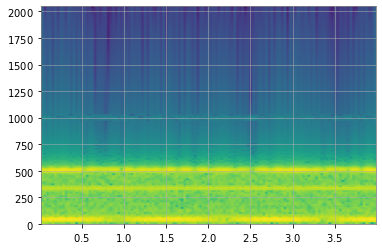

In [0]:
from gwpy.signal import filter_design
bp = filter_design.bandpass(20, 500, a.sample_rate)
notches = [filter_design.notch(line, a.sample_rate) for line in [20,25,]]
zpk = filter_design.concatenate_zpks(bp, *notches)
hfilt = a.filter(zpk, filtfilt=True)
plt.specgram(hfilt,Fs=4096)

##blip

plt.specgram(y,Fs=1024)
plt.show()

16384


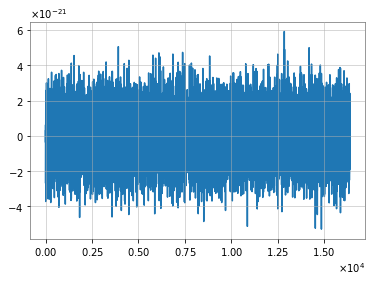

In [0]:
freq=4096 #frequency in Hz
# The color of the noise matches a PSD which you provide
flow = 30.0 #higher flow rates to higer noise amplitude 
delta_f = 1.0 / 16
flen = int((freq/2) / delta_f) + 1
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)

# Generate n seconds of noise at 4096 Hz
n=4 #time for which data is required
delta_t = 1 / freq #defines time step of the noise larger the time step lower will be the frequency
tsamples = int(n/ delta_t)
cc = 5*pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=200)
print(len(cc))
plt.plot(cc)